In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/walmart_cleaned.csv')

In [ ]:
df.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  int64  
 4   Dept          421570 non-null  float64
 5   Weekly_Sales  421570 non-null  float64
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  Type          421570 non-null  int64  
 16  Size          421570 non-null  int64  
dtypes: float64(11), int64(5), object(1)
memory usage

In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  int64  
 4   Dept          421570 non-null  float64
 5   Weekly_Sales  421570 non-null  float64
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  Type          421570 non-null  int64  
 16  Size          421570 non-null  int64  
dtypes: float64(11), int64(5), object(1)
memory usage

In [ ]:
anomaly_inputs=['Weekly_Sales','Fuel_Price']

In [ ]:
model_IF=IsolationForest(contamination=0.2,random_state=50)

In [ ]:
model_IF.fit(df[anomaly_inputs])

IsolationForest(contamination=0.2, random_state=50)

In [ ]:
df['scores']=model_IF.decision_function(df[anomaly_inputs])
df['anomaly_inputs']=model_IF.predict(df[anomaly_inputs])

In [ ]:
df.loc[:,['Weekly_Sales','Fuel_Price','scores','anomaly_inputs']]

,Weekly_Sales,Fuel_Price,scores,anomaly_inputs
0,24924.50,2.572,-0.073617,-1
1,11737.12,2.572,-0.044508,-1
2,13223.76,2.572,-0.049821,-1
3,37.44,2.572,-0.050463,-1
4,1085.29,2.572,-0.045002,-1
...,...,...,...,...
421565,26240.14,3.882,0.017100,1
421566,2660.02,3.882,0.054740,1
421567,4131.54,3.882,0.066767,1
421568,717.82,3.882,0.056927,1


In [ ]:
anomaly_inputs = ['Weekly_Sales', 'Fuel_Price']
y_pred = model_IF.predict(df[anomaly_inputs])
anomaly_indices = y_pred == -1
df[anomaly_indices]

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,scores,anomaly_inputs
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,-0.073617,-1
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,-0.044508,-1
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,-0.049821,-1
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,-0.050463,-1
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315,-0.045002,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421503,423219,45,2012-10-26,0,8.0,37857.64,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,-0.006753,-1
421512,423228,45,2012-10-26,0,92.0,54608.75,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,-0.046663,-1
421515,423231,45,2012-10-26,0,40.0,38673.87,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,-0.009382,-1
421530,423246,45,2012-10-26,0,95.0,56017.47,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221,-0.049761,-1


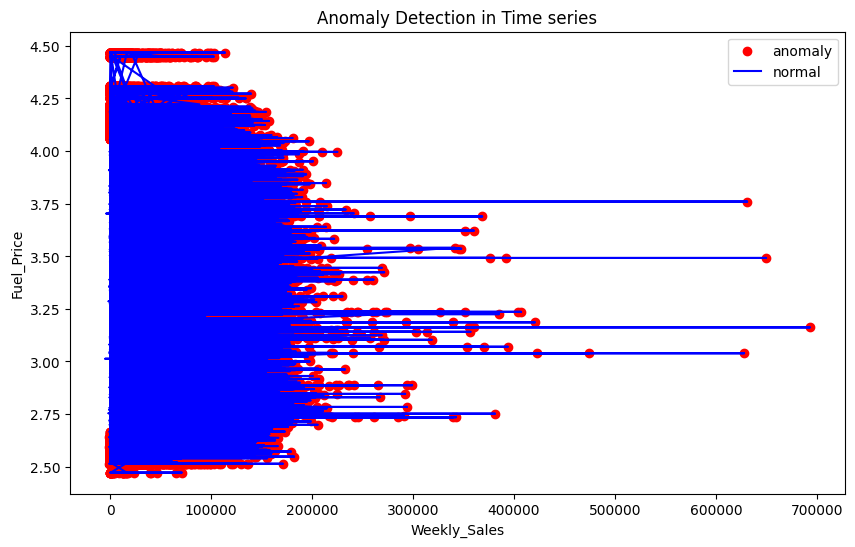

Number of Anomalies:
        Unnamed: 0  Store        Date  IsHoliday  Dept  Weekly_Sales  \
0                0      1  2010-02-05          0   1.0      24924.50   
1                1      1  2010-02-05          0  26.0      11737.12   
2                2      1  2010-02-05          0  17.0      13223.76   
3                3      1  2010-02-05          0  45.0         37.44   
4                4      1  2010-02-05          0  28.0       1085.29   
...            ...    ...         ...        ...   ...           ...   
421503      423219     45  2012-10-26          0   8.0      37857.64   
421512      423228     45  2012-10-26          0  92.0      54608.75   
421515      423231     45  2012-10-26          0  40.0      38673.87   
421530      423246     45  2012-10-26          0  95.0      56017.47   
421552      423268     45  2012-10-26          0  38.0      47799.07   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572    

In [ ]:
anomaly_indices = df[df['anomaly_inputs'] == -1]
plt.figure(figsize=(10,6))
plt.scatter(anomaly_indices['Weekly_Sales'],anomaly_indices['Fuel_Price'],color='red',label='anomaly')
plt.plot(df['Weekly_Sales'],df['Fuel_Price'],color='blue',label='normal')
plt.title('Anomaly Detection in Time series')
plt.xlabel('Weekly_Sales')
plt.ylabel('Fuel_Price')
plt.legend()
plt.show()
print("Number of Anomalies:")
print(anomaly_indices)